In [1]:
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999

### EDA

#### Shooting Accuracy

In [16]:
shooting_accuracy_df.groupby('year').mean()

,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes
year,,,,,,,,,
2013,0.499677,0.503613,0.604774,0.382677,0.395677,0.390419,0.387097,0.356839,0.366097
2014,0.503903,0.507903,0.608742,0.391161,0.396516,0.394645,0.387419,0.357613,0.365742
2015,0.498452,0.502613,0.600774,0.391290,0.396226,0.394742,0.384839,0.345258,0.355968
2016,0.505194,0.508871,0.603194,0.398258,0.400290,0.399161,0.376742,0.353161,0.359387
2017,0.516806,0.519968,0.610613,0.411161,0.404484,0.408323,0.386355,0.355871,0.363452
2018,0.523935,0.527032,0.631516,0.397484,0.403387,0.400258,0.392677,0.359194,0.367097
2019,0.527258,0.530548,0.629613,0.401806,0.403065,0.402419,0.383452,0.353677,0.360968
2020,0.531323,0.534774,0.634806,0.398194,0.403613,0.400161,0.389645,0.354419,0.362806
2021,0.541452,0.544645,0.642226,0.425645,0.412645,0.421968,0.392032,0.363871,0.371032


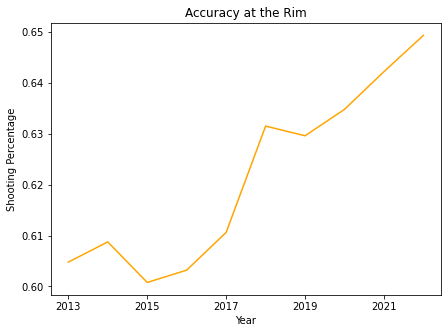

In [17]:
plt.figure(figsize = (7,5))
shooting_accuracy_df.groupby('year').mean()['Accuracy at Rim'].plot(color = 'orange')
plt.title('Accuracy at the Rim')
plt.ylabel('Shooting Percentage')
plt.xlabel('Year');

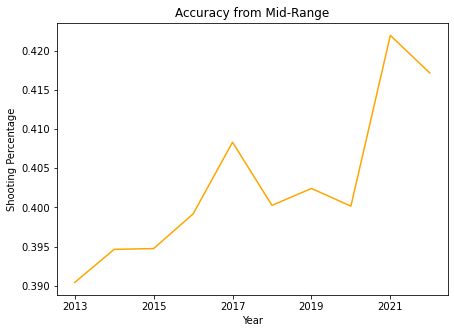

In [18]:
plt.figure(figsize = (7,5))
shooting_accuracy_df.groupby('year').mean()['Accuracy on All Midrange'].plot(color = 'orange')
plt.title('Accuracy from Mid-Range')
plt.ylabel('Shooting Percentage')
plt.xlabel('Year');

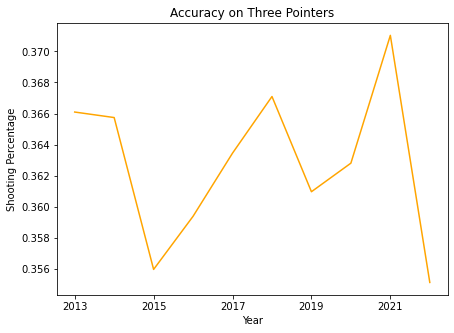

In [19]:
plt.figure(figsize = (7,5))
shooting_accuracy_df.groupby('year').mean()['Accuracy on All Threes'].plot(color = 'orange')
plt.title('Accuracy on Three Pointers')
plt.ylabel('Shooting Percentage')
plt.xlabel('Year');

<AxesSubplot:>

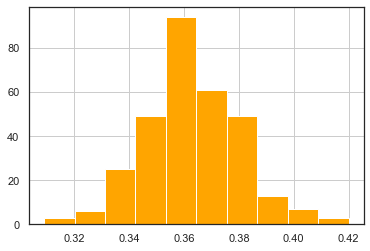

In [29]:
shooting_accuracy_df['Accuracy on All Threes'].hist(color = 'orange')
# curious who these teams were who shot above 40% from Three.

In [21]:
# All Sniper Teams.  All teams who have shot over 40% as a team.
top_shooting_teams = shooting_accuracy_df[shooting_accuracy_df['Accuracy on All Threes'] > .4]
top_shooting_teams = top_shooting_teams[['Team', 'Accuracy on All Threes', 'year']]
top_shooting_teams.sort_values(by = 'Accuracy on All Threes', ascending = False)

,Team,Accuracy on All Threes,year
10,Golden State,0.420,2016
13,LA Clippers,0.418,2021
10,Golden State,0.414,2013
10,Golden State,0.407,2015
16,Miami,0.405,2013
27,San Antonio,0.401,2019
3,Brooklyn,0.401,2021


In [25]:
# "average" columns provide a summary of the league as a whole that year
shooting_accuracy_df[shooting_accuracy_df['Team'] == 'Average']

,Team,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,year,team_year
0,Average,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,2013,Average 2013
0,Average,0.504,0.508,0.608,0.391,0.398,0.395,0.390,0.358,0.366,2014,Average 2014
0,Average,0.498,0.503,0.600,0.392,0.398,0.395,0.386,0.346,0.357,2015,Average 2015
0,Average,0.505,0.509,0.603,0.399,0.401,0.400,0.377,0.354,0.360,2016,Average 2016
0,Average,0.517,0.520,0.610,0.412,0.407,0.409,0.387,0.356,0.364,2017,Average 2017
0,Average,0.524,0.527,0.631,0.399,0.404,0.401,0.393,0.359,0.367,2018,Average 2018
0,Average,0.527,0.531,0.629,0.403,0.405,0.404,0.383,0.353,0.360,2019,Average 2019
0,Average,0.532,0.535,0.635,0.401,0.408,0.403,0.390,0.355,0.363,2020,Average 2020
0,Average,0.541,0.545,0.641,0.428,0.417,0.424,0.393,0.365,0.372,2021,Average 2021
0,Average,0.531,0.535,0.648,0.425,0.411,0.420,0.383,0.346,0.355,2022,Average 2022


#### Three Point Frequency vs Mid-Range Frequency

In [22]:
# Teams who shot threes at the highest frequency.  The "let it fly" teams.

top_shooting_teams = shooting_frequency_df[shooting_frequency_df['Frequency All Threes'] >.4]
top_shooting_teams = top_shooting_teams[['Team', 'Frequency All Threes', 'year']]
top_shooting_teams.sort_values(by = 'Frequency All Threes', ascending = False).head(10)

,Team,Frequency All Threes,year
11,Houston,0.486,2019
11,Houston,0.467,2018
11,Houston,0.462,2020
29,Utah,0.453,2021
11,Houston,0.438,2017
29,Utah,0.435,2022
10,Golden State,0.427,2022
18,Minnesota,0.425,2022
7,Dallas,0.424,2020
25,Portland,0.418,2021


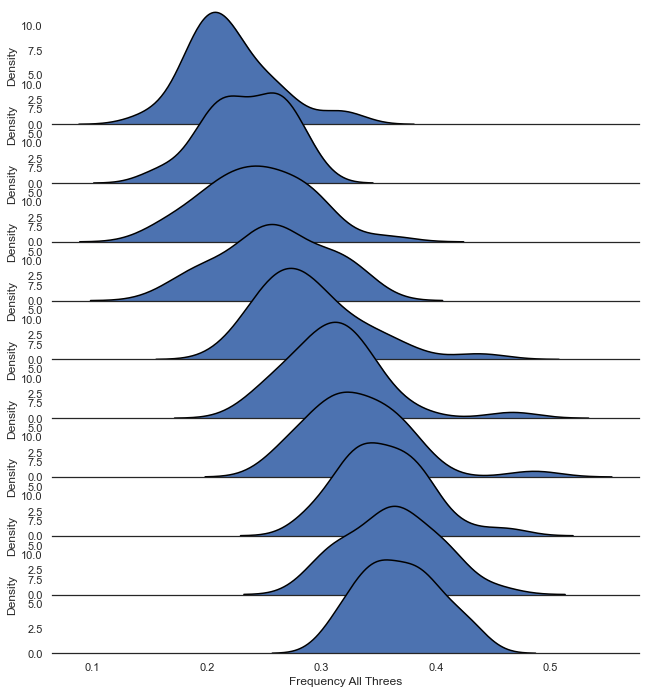

In [24]:
# source: https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(shooting_frequency_df, row= 'year', aspect=9, height=1)
g.map_dataframe(sns.kdeplot, x= 'Frequency All Threes', fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x='Frequency All Threes', color='black')
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.despine(left=True);
plt.savefig('./Visuals/Ridge Plot 3pt Frequency.jpg', bbox_inches="tight", dpi=100)

# interesting to look at .4 and beyond on the x axis.  As the years go on, teams are shooting more and more frequently from three.
# the distribution each year tightens.  less variation among teams approach.  The Great Analytics Shift

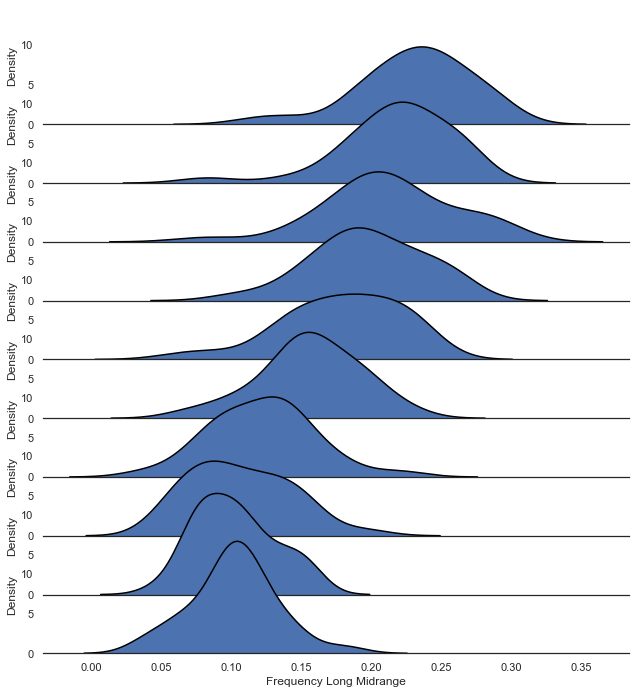

In [33]:
# How does the above compare to mid-range?  Looks like they have an inverse relationship.  Threes up, midrange down.

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(shooting_frequency_df, row= 'year', aspect=9, height=1)
g.map_dataframe(sns.kdeplot, x= 'Frequency Long Midrange', fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x='Frequency Long Midrange', color='black')
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.despine(left=True);
plt.savefig('./Visuals/Ridge Plot Long Two Frequency.jpg', bbox_inches="tight", dpi=100)

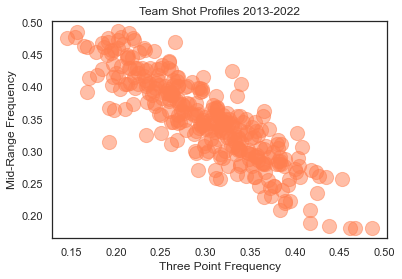

In [26]:
plt.scatter(shooting_frequency_df['Frequency All Threes'], shooting_frequency_df['Frequency all Midrange'], s = 200, alpha = .5, c = 'coral')
plt.title('Team Shot Profiles 2013-2022')
plt.xlabel('Three Point Frequency')
plt.ylabel('Mid-Range Frequency');

In [27]:
threes = df_all[['Team', 'OFFENSE: Pts/Poss', 'year', 'Frequency All Threes']]
threes.loc[(threes.Team == 'Average')]

,Team,OFFENSE: Pts/Poss,year,Frequency All Threes
0,Average,105.8,2013,0.220
31,Average,106.7,2014,0.235
62,Average,105.8,2015,0.244
93,Average,106.6,2016,0.259
124,Average,109.0,2017,0.290
155,Average,108.4,2018,0.311
186,Average,110.6,2019,0.331
217,Average,110.9,2020,0.355
248,Average,112.9,2021,0.361
279,Average,111.4,2022,0.368


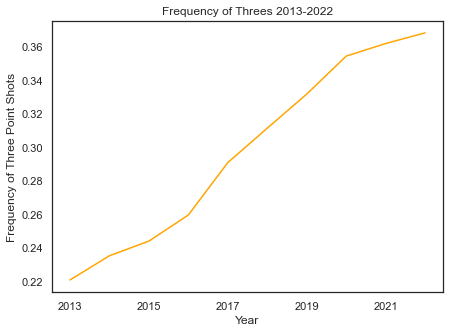

In [28]:
plt.figure(figsize = (7,5))
df_all.groupby('year').mean()['Frequency All Threes'].plot(color = 'orange')
plt.title('Frequency of Threes 2013-2022')
plt.ylabel('Frequency of Three Point Shots')
plt.xlabel('Year')
plt.savefig('./Visuals/line chart threes 2013_2022');